In [1]:
# Importing libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import cosine
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Function to find cosine similarity between two vectors tfidf_1, tfidf_2
def cosine_similarity(tfidf_1, tfidf_2):
    return cosine(tfidf_1.todense(),tfidf_2.todense())

In [3]:
# function to find accuracy by determing confusion mastrix

def accuracy(similarity, data, threshold):
    
    
    similar = list( [1 if i>threshold else 0 for i in similarity] )
    X = list(data['is_duplicate'])
    false_pos =0
    false_neg=0
    true_pos=0
    true_neg=0

    for i in range(0, len(X)):
        if(X[i]== similar[i]):
            if X[i]==1:
                true_pos =1+true_pos
            else:
                true_neg = 1+true_neg
        else:
            if X[i]==1:
                false_neg =1+false_neg
            else:
                false_pos  = 1+false_pos
        
    acc = (true_pos+true_neg)/(true_pos+true_neg+false_pos+false_neg)
    acc*=100
    return acc    

In [4]:
x = np.linspace(-0,1,10)

In [5]:
# Reading data
data = pd.read_csv("/home/diksha/Desktop/quora_duplicate_questions.tsv", sep="\t")


In [6]:
# cleaning of the data

from ipynb.fs.full.Data_preprocessing import clean

data['question1'] = data['question1'].apply(clean)
data['question2'] = data['question2'].apply(clean)

In [7]:
# Splitting the dataset

train_data, test_data = train_test_split(data, test_size = 0.3, random_state = 0)

In [8]:
'''
Vectorizing the text is what allows us to have numerical representation of
text that we can work with.

To vectorize text is to represent text as numerical vectors.
We create vocabulary set: the vocabulary set contains all words that occur 
throughout the corpus.

we can represent each sentence as a vector comprised of the number of times certain 
words from the set V occurs in each sentence, where each component 
corresponds to the index of that word in the vocabulary set. 
This model is what is called a Vector Space Model.

'''

#Countvectorizer : Convert a collection of text documents to a matrix of token counts


vectorizer = CountVectorizer( max_features = 50000)
X = vectorizer.fit_transform(pd.Series(list(train_data['question1']) + list(train_data['question2'])).astype(str).unique())
print(vectorizer.get_feature_names())

['00', '000', '0000', '0019', '01', '012', '012345', '012345678', '016', '02', '03', '04', '04091982male0828amist', '05', '06451600', '07', '0809', '086', '09', '090', '0address', '0math', '0s', '0x0020', '0x80070426', '0xc0000142', '10', '100', '1000', '10000', '100000', '1000000', '10000000', '100000000', '1000000000', '10000month', '10001500', '1000rs', '1000s', '100100', '100105', '100200', '100240v', '100300', '1006', '10092016', '100ah', '100cc', '100g', '100m', '100math', '100mb', '100mbps', '100mm', '100s', '100th', '100w', '101', '1010', '1012', '10129', '1013', '1014', '1015', '1019', '102', '1020', '102016', '1023', '1024', '1027', '103', '1030', '1031', '104', '10400', '1048576', '105', '1050', '10500', '106', '1060', '1065', '107', '1070', '108', '1080', '1080i', '1080p', '1082016', '109', '1099', '1099misc', '1099s', '10a', '10can', '10cgpa', '10cm', '10day', '10ft', '10m', '10math', '10mg', '10minute', '10mm', '10month', '10ms', '10n', '10sec', '10th', '10x', '10year', '

(-0.5, 1439.5, 1079.5, -0.5)

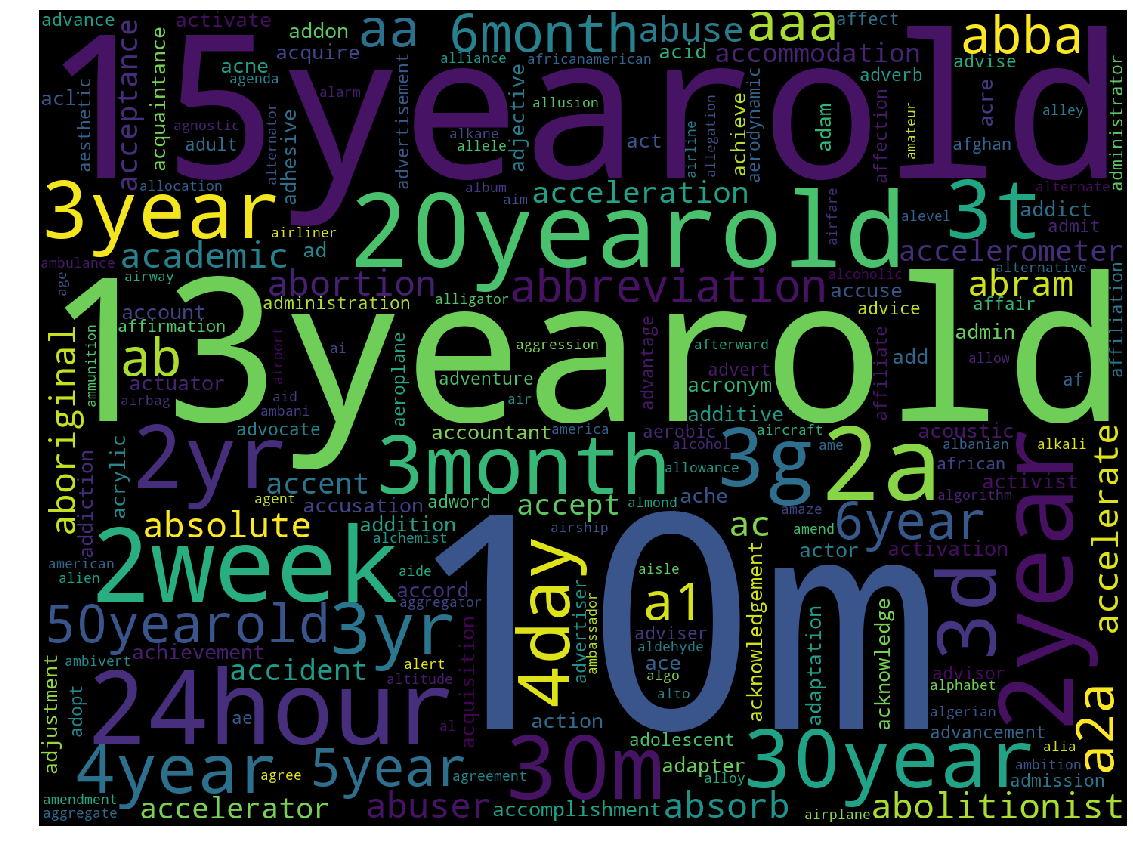

In [9]:
# Wordcloud formed using bag of wwords
words = vectorizer.get_feature_names()
cloud = WordCloud(width=1440, height=1080).generate(" ".join(words))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [10]:
#unigram tfidf 

'''
Term Frequency (tf): gives us the frequency of the word in each document in the corpus. 
It is the ratio of number of times the word appears in a document compared to the total 
number of words in that document. It increases as the number of occurrences of that word 
within the document increases. Each document has its own tf.

Inverse Data Frequency (idf): used to calculate the weight of rare words across all documents 
in the corpus. The words that occur rarely in the corpus have a high IDF score.

Combining these two we come up with the TF-IDF score for a word in a document in the corpus.
It is the product of tf and idf:


'''
tfidf_vect = TfidfVectorizer(max_features = 50000)
tfidf_vect.fit( pd.Series(list(train_data['question1']) + list(train_data['question2'])).astype(str).unique() )
tfidf_train_1 = tfidf_vect.transform(train_data['question1'])
tfidf_train_2 = tfidf_vect.transform(train_data['question2'])

tfidf_test_1 = tfidf_vect.transform(test_data['question1'])
tfidf_test_2 = tfidf_vect.transform(test_data['question2'])

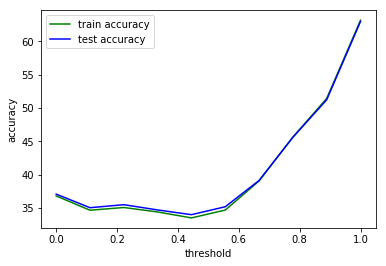

In [12]:
# similarity between two questions in both datasets and accuracy obtained on different thresholds
'''
similarity is calculated between two questions using cosine similarity and tfidf vectors.
tfidf vectors are fitted on training data set and then transformed for question1 and question2. 
Using the vectors of question1 and question2 and cosine similarity, similarity is calculated between 
question1 and question2. 

To calculate accuracy, we considered a threshold value for which if similarity > threshold,
quesstions are similar, otherwise not. Now using the original data['isduplicate'], we check for:

True_pos  = A true positive is an outcome where the model correctly predicts the positive class
True_neg  = A true negative is an outcome where the model correctly predicts the negative class.
False_pos = A false positive is an outcome where the model incorrectly predicts the positive class. 
False_neg = A false negative is an outcome where the model incorrectly predicts the negative class.

accuracy is calculated as (total umber of correct predictions)/(total number of predictions done)

accuracy is calculated for different threshold values for both test and training data sets.

'''
similarity_train = []

for i in range(0, tfidf_train_1.shape[0]):
    similarity_train.append(cosine_similarity(tfidf_train_1[i], tfidf_train_2[i]))    
    
accuracy_train = []
for i in x:
    accuracy_train.append(accuracy(similarity_train, train_data, i))

similarity_test = []

for i in range(0, tfidf_test_1.shape[0]):
    similarity_test.append(cosine_similarity(tfidf_test_1[i], tfidf_test_2[i]))    
    
accuracy_test = []
for i in x:
    accuracy_test.append(accuracy(similarity_test, test_data, i))
    

plt.plot(x,accuracy_train, color='green', label='train accuracy')
plt.plot(x,accuracy_test, color='blue', label='test accuracy')
plt.xlabel('threshold')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [13]:
#n-grams using tfidf and cosine similarity

'''
Ordering things differently can create the meaning of sentences dramatically.
n gram model lets you to to take into account the sequences of words not just singular words.
‘n’ in the n-gram approach represents a number, and it represents how many words there are in one gram
A bi-gram is a sequence of two words. 

'''

nvectorizer = CountVectorizer(ngram_range=(2,2), max_features = 50000)
X = nvectorizer.fit_transform(pd.Series(list(train_data['question1']) + list(train_data['question2'])).astype(str).unique())
print(nvectorizer.get_feature_names())

['10 am', '10 and', '10 best', '10 bollywood', '10 books', '10 cbse', '10 cgpa', '10 day', '10 days', '10 favorite', '10 for', '10 from', '10 hours', '10 how', '10 if', '10 in', '10 is', '10 kg', '10 kgs', '10 lakh', '10 lakhs', '10 million', '10 minutes', '10 months', '10 most', '10 nonascii', '10 on', '10 or', '10 percent', '10 pounds', '10 seconds', '10 things', '10 times', '10 to', '10 year', '10 years', '10 yrs', '100 and', '100 billion', '100 days', '100 dollar', '100 in', '100 million', '100 percent', '100 shares', '100 years', '1000 and', '1000 calories', '1000 currency', '1000 dollar', '1000 in', '1000 inr', '1000 note', '1000 notes', '1000 rs', '1000 rupee', '1000 rupees', '1000 years', '10000 and', '10000 in', '10000 inr', '10000 month', '10000 per', '10000 to', '100000 in', '10th and', '10th board', '10th class', '10th grade', '11 and', '11 cbse', '11 year', '11 years', '11th and', '11th class', '11th grade', '11th standard', '12 and', '12 board', '12 boards', '12 cbse', '1

(-0.5, 1439.5, 1079.5, -0.5)

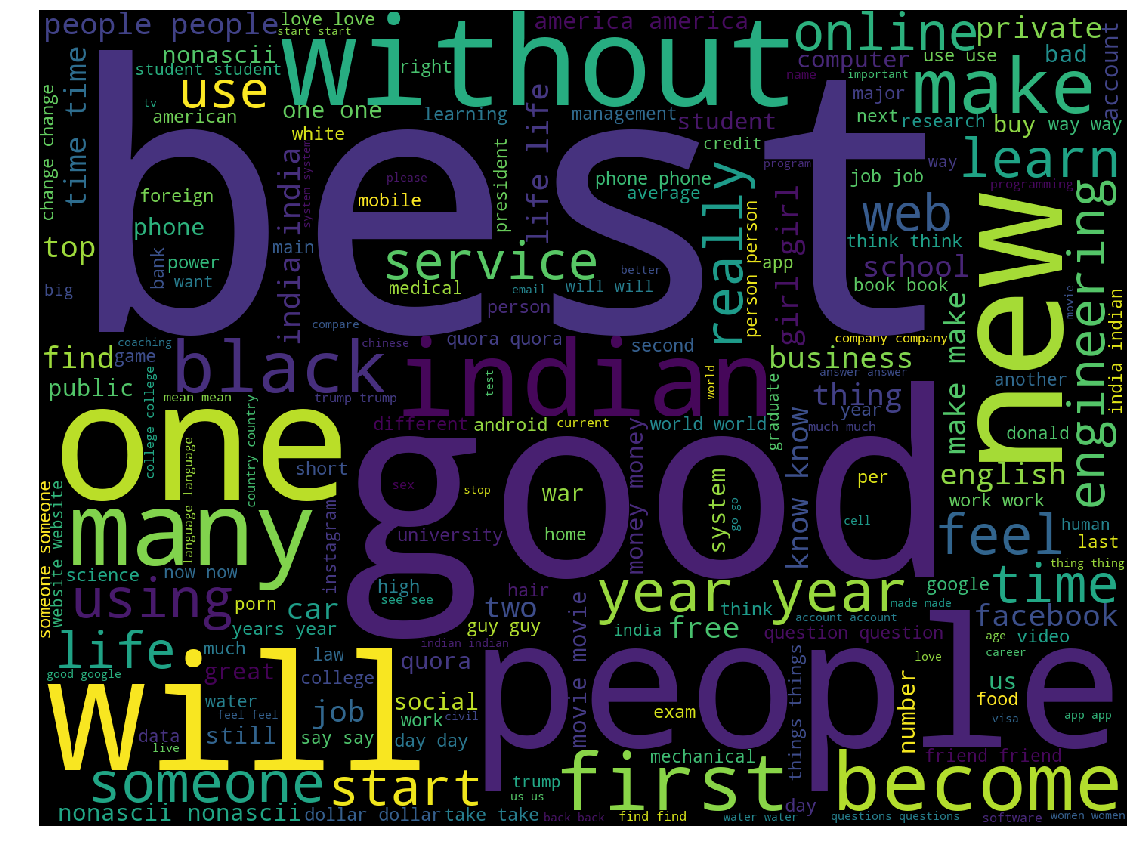

In [14]:
#wordcloud using bigram word bag
nwords = nvectorizer.get_feature_names()
cloud = WordCloud(width=1440, height=1080).generate(" ".join(nwords))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

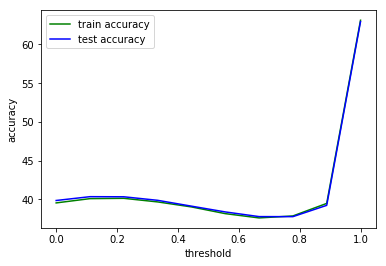

In [15]:
#ngram TFIDF
ntfidf_vect = TfidfVectorizer(ngram_range=(2,2), max_features = 50000)
ntfidf_vect.fit( pd.Series(list(train_data['question1']) + list(train_data['question2'])).astype(str).unique() )
ntfidf_train_1 = ntfidf_vect.transform(train_data['question1'])
ntfidf_train_2 = ntfidf_vect.transform(train_data['question2'])

ntfidf_test_1 = ntfidf_vect.transform(test_data['question1'])
ntfidf_test_2 = ntfidf_vect.transform(test_data['question2'])



nsimilarity_train = []

for i in range(0, ntfidf_train_1.shape[0]):
    nsimilarity_train.append(cosine_similarity(ntfidf_train_1[i], ntfidf_train_2[i]))

naccuracy_train = []
for i in x:
    naccuracy_train.append(accuracy(nsimilarity_train, train_data, i))


nsimilarity_test = []

for i in range(0, ntfidf_test_1.shape[0]):
    nsimilarity_test.append(cosine_similarity(ntfidf_test_1[i], ntfidf_test_2[i]))
    
naccuracy_test = []
for i in x:
    naccuracy_test.append(accuracy(nsimilarity_test, test_data, i))
   
plt.plot(x,naccuracy_train, color='green', label='train accuracy')
plt.plot(x,naccuracy_test, color='blue', label='test accuracy')
plt.xlabel('threshold')
plt.ylabel('accuracy')
plt.legend()
plt.show()